# section 1

In [ ]:
data_file = 'drive/My Drive/Projects/university/data-mining/hw-3/out.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv(data_file)

In [ ]:
y = df['livingSpace']
x = df.drop(columns = ['livingSpace'])

## Linear Regression from scratch

In [ ]:
class MyLinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros((X.shape[1], 1))
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

    def score():
      return r2_score(self.predict(x), y)


In [ ]:
my_reg = MyLinearRegression(n_iterations = 200)

In [ ]:
xx = x[['noRooms', 'livingSpaceRange']][:1000]
yy = y[:1000]

In [ ]:
my_reg.fit(xx.to_numpy(), yy.to_numpy().reshape((len(yy),1)))

In [ ]:
my_reg.loss

[array([4943.0632039]),
 array([2254.78294414]),
 array([1044.31630807]),
 array([499.21911277]),
 array([253.69781496]),
 array([143.05812012]),
 array([93.14832853]),
 array([70.58248944]),
 array([60.32895592]),
 array([55.6198927]),
 array([53.40814961]),
 array([52.32177172]),
 array([51.7430414]),
 array([51.39382768]),
 array([51.14889466]),
 array([50.95184578]),
 array([50.77727871]),
 array([50.61374606]),
 array([50.45608356]),
 array([50.30195599]),
 array([50.15030197]),
 array([50.00063379]),
 array([49.85272211]),
 array([49.70645405]),
 array([49.56176926]),
 array([49.41863118]),
 array([49.27701401]),
 array([49.13689697]),
 array([48.99826159]),
 array([48.86109056]),
 array([48.7253672]),
 array([48.59107522]),
 array([48.45819859]),
 array([48.32672151]),
 array([48.19662835]),
 array([48.06790371]),
 array([47.94053232]),
 array([47.81449913]),
 array([47.68978923]),
 array([47.56638789]),
 array([47.44428054]),
 array([47.32345279]),
 array([47.20389041]),
 array

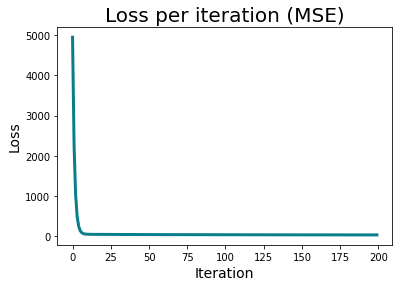

In [ ]:
xs = np.arange(len(my_reg.loss))
ys = my_reg.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

### with sklearn

#### most corrolation with livingSpace

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(xx, yy)

LinearRegression()

In [ ]:
reg.score(xx, yy)

0.932453417376723

In [ ]:
reg.coef_

array([ 3.34903885, 17.58251291])

In [ ]:
 from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(reg, xx, yy, cv=5)

In [ ]:
scores

array([0.92911069, 0.9424413 , 0.93473943, 0.92943177, 0.92063566])

In [ ]:
scores_10 = cross_val_score(reg, xx, yy, cv=10)

In [ ]:
scores_10

array([0.9268104 , 0.93174509, 0.941755  , 0.94136537, 0.95062757,
       0.90637917, 0.93569861, 0.91988941, 0.92677602, 0.91494598])

#### two feature with most corrolation and two feature with less corrolation

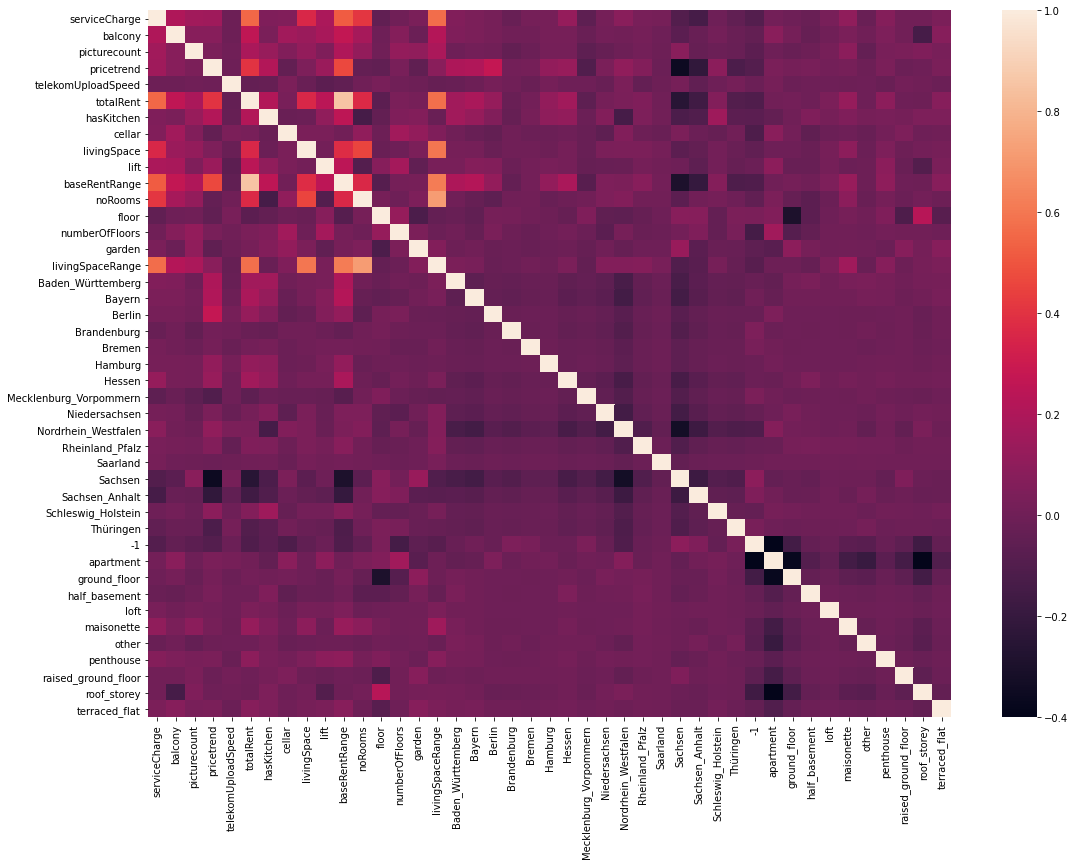

In [ ]:
import seaborn as sns

plt.figure(figsize=(18, 13))

corr = df.corr()

sns.heatmap(corr)

In [ ]:
xxx = x[['Sachsen', 'hasKitchen']][:10000]
yyy = y[:10000]

In [ ]:
scores_5 = cross_val_score(reg, xxx, yyy, cv=5)

In [ ]:
scores_5

array([0.01167688, 0.00956394, 0.01042751, 0.01427942, 0.01151988])

In [ ]:
scores_10 = cross_val_score(reg, xxx, yyy, cv=10)

In [ ]:
scores_10

array([ 1.59570047e-02,  7.51993589e-03,  2.32440858e-03,  1.35951181e-02,
       -6.39831080e-05,  2.32397215e-02,  1.35934444e-02,  1.45733206e-02,
        6.28912601e-03,  1.32110000e-02])

#### desired features

In [ ]:
scores_5 = cross_val_score(reg, x[:10000], y[:10000], cv=5)

In [ ]:
scores_5

array([0.93414199, 0.93730446, 0.93016454, 0.92464568, 0.74040144])

In [ ]:
scores_10 = cross_val_score(reg, x[:10000], y[:10000], cv=10)

In [ ]:
scores_10

array([0.93326217, 0.93501918, 0.93539142, 0.93916946, 0.93191536,
       0.92876727, 0.93107338, 0.91932932, 0.93148848, 0.6240881 ])

### ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
clf = Ridge(alpha = 1.0)

In [ ]:
scores_5 = cross_val_score(clf, x[:100000], y[:100000], cv=5)

In [ ]:
scores_5

array([0.90725953, 0.93277911, 0.11835627, 0.93343634, 0.93443261])

In [ ]:
scores_10 = cross_val_score(clf, x[:100000], y[:100000], cv=10)

In [ ]:
scores_10

array([0.88503201, 0.93225167, 0.93310587, 0.93343942, 0.07083868,
       0.93083049, 0.93372592, 0.93405594, 0.93516067, 0.93476537])

### Lasso

In [ ]:
from sklearn import linear_model

In [ ]:
lasso = linear_model.Lasso(alpha= 0.5)

In [ ]:
scores_5 = cross_val_score(lasso, x[:100000], y[:100000], cv=5)

In [ ]:
scores_5

array([0.90626611, 0.93178448, 0.11806386, 0.93201498, 0.93343159])

In [ ]:
scores_10 = cross_val_score(lasso, x[:100000], y[:100000], cv=10)

In [ ]:
scores_10

array([0.88358494, 0.93105005, 0.93143626, 0.93248182, 0.07067982,
       0.93013867, 0.93225244, 0.93208472, 0.93367574, 0.9334326 ])

# section three

### classification

In [ ]:
mobile_file = 'drive/My Drive/Projects/university/data-mining/hw-3/archive'

In [ ]:
train = pd.read_csv(mobile_file + '/train.csv')
test = pd.read_csv(mobile_file + '/test.csv')

In [ ]:
train_y = train['price_range']
train_x = train.drop(columns = ['price_range'])

In [ ]:
# test_y = test['price_range']
# test_x = test.drop(columns = ['price_range'])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [ ]:
multi_class = OneVsRestClassifier(clf).fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
predictions = multi_class.predict(train_x)

In [ ]:
print(classification_report(train_y,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       500
           1       0.66      0.52      0.58       500
           2       0.56      0.44      0.49       500
           3       0.68      0.90      0.77       500

    accuracy                           0.69      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.68      0.69      0.68      2000



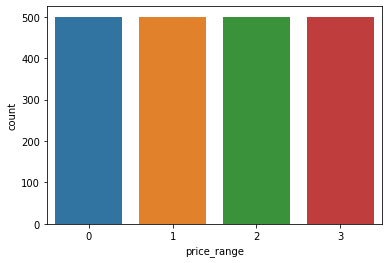

In [ ]:
sns.countplot(x="price_range", data=train)

### convert multi-class to binary-class

In [ ]:
train_y.replace({2: 1, 3: 1}, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


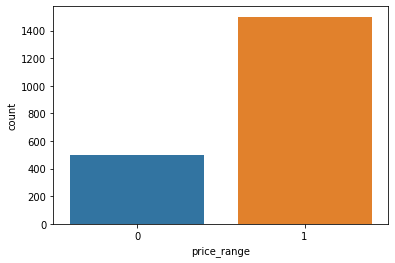

In [ ]:
sns.countplot(train_y)

In [ ]:
clf.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
predictions = clf.predict(train_x)

In [ ]:
print(classification_report(train_y, predictions))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       500
           1       0.95      0.96      0.95      1500

    accuracy                           0.93      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.93      0.93      0.93      2000



### Resampling

#### under-sampling

In [ ]:
df = train_x.join(train_y)

In [ ]:
class_0 = df[df['price_range'] == 0]
class_1 = df[df['price_range'] == 1]

In [ ]:
print(len(class_0))
print(len(class_1))

500
1500


In [ ]:
class_0.shape

(500, 21)

In [ ]:
class_1_under = class_1.sample(class_0.shape[0])

In [ ]:
new_df = [class_1_under, class_0]
new_df = pd.concat(new_df)

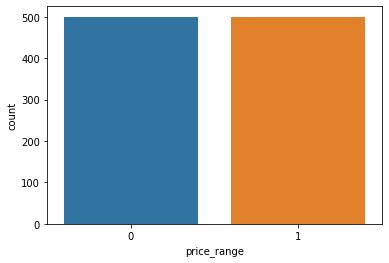

In [ ]:
sns.countplot(x = 'price_range', data = new_df)

In [ ]:
# shuffle
new_df = new_df.sample(frac = 1)

In [ ]:
train_x = new_df.drop(columns = ['price_range'])
train_y = new_df['price_range']

In [ ]:
clf = LogisticRegression()clf = LogisticRegression()

In [ ]:
clf.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
pred = clf.predict(train_x)

In [ ]:
print(classification_report(train_y, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       500
           1       0.92      0.92      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



#### over-sampling

In [ ]:
class_0_over = class_0.sample(class_1.shape[0], replace = True)

In [ ]:
new_df = [class_1, class_0_over]

In [ ]:
new_df = pd.concat(new_df)

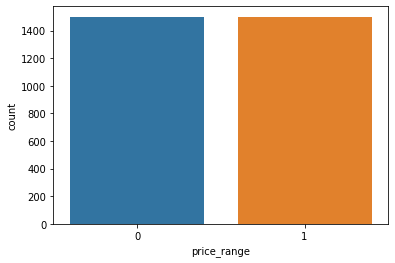

In [ ]:
sns.countplot(x = 'price_range', data = new_df)

In [ ]:
new_df = new_df.sample(frac = 1)

In [ ]:
train_x = new_df.drop(columns = ['price_range'])
train_y = new_df['price_range']

In [ ]:
clf = LogisticRegression()
clf.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
pred = clf.predict(train_x)
print(classification_report(train_y, pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1500
           1       0.93      0.92      0.93      1500

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



## Forward selection

In [ ]:
# !pip uninstall scikit-learn -y

In [ ]:
# !pip install -U scikit-learn

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(clf, direction='forward')

In [ ]:
train_x = train.drop(columns = ['price_range'])
train_y = train['price_range']

In [ ]:
sfs.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


SequentialFeatureSelector(estimator=LogisticRegression())

In [ ]:
forward_data = sfs.transform(train_x)

In [ ]:
new_df = pd.DataFrame(forward_data)

In [ ]:
clf = LogisticRegression()
clf.fit(new_df, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
pred = clf.predict(new_df)

In [ ]:
print(classification_report(train_y, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       500
           1       0.98      0.98      0.98      1500

    accuracy                           0.97      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.97      0.97      0.97      2000



## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)

In [ ]:
pca.fit(train_x)

PCA(n_components=10)

In [ ]:
pca_x = pd.DataFrame(pca.transform(train_x))

In [ ]:
clf = LogisticRegression()
clf.fit(pca_x, train_y)
pred = clf.predict(pca_x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(classification_report(train_y, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       500
           1       0.98      0.95      0.97      1500

    accuracy                           0.95      2000
   macro avg       0.92      0.95      0.93      2000
weighted avg       0.95      0.95      0.95      2000



## Backward selection

In [ ]:
sfs = SequentialFeatureSelector(clf, direction='backward')

In [ ]:
sfs.fit(train_x, train_y)
backward_data = sfs.transform(train_x)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [ ]:
new_df = pd.DataFrame(backward_data)

In [ ]:
clf = LogisticRegression()
clf.fit(new_df, train_y)
pred = clf.predict(new_df)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(classification_report(train_y, pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       500
           1       0.95      0.97      0.96      1500

    accuracy                           0.94      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.94      0.94      0.94      2000

